In [23]:
import glob
import os
import pandas as pd

# Get the full paths of all CSV files in the current directory
from pathlib import Path

csv_files = []
folder = Path("./Data")  
for file in folder.glob("*.csv"):
     csv_files.append(os.path.join(folder, file.name))
print(csv_files)
df_list = []
for file in csv_files:

    df = pd.read_csv(file)

    df_list.append(df)



['Data\\chatgpt_deep_research.csv', 'Data\\chatgpt_o3.csv', 'Data\\chatgpt_o3_1.csv', 'Data\\claude.csv', 'Data\\deepseek.csv']


In [26]:
for i in range(len(df_list)):
    df_list[i].columns = ['Sentence', 'Importance','Longstorage']
    print(df_list[i].head())

                              Sentence  Importance Longstorage
0                     I work in sales.         0.8           是
1                                 Hey!         0.1           否
2              My dog's name is Buddy.         0.7           是
3     I skipped chemistry class today.         0.5           否
4  I need to wash the dishes tomorrow.         0.4           否
                             Sentence  Importance Longstorage
0              I caught a cold today.         0.8           否
1  I was diagnosed with cancer today.         1.0           是
2            I eat a hamburger today.         0.3           否
3     I have a meeting at work today.         0.5           否
4          I got a promotion at work.         0.9           是
                             Sentence  Importance Longstorage
0              I caught a cold today.         0.8          no
1  I was diagnosed with cancer today.         1.0         yes
2            I ate a hamburger today.         0.3          no
3 

In [27]:

combined_df = pd.concat(df_list, ignore_index=True, axis=0)


sentence_df = combined_df.sample(frac=1).reset_index(drop=True)
# Observe the first few rows of the DataFrame
print(sentence_df.head())
sentence_df.columns = ['Sentence', 'Importance','Longstorage']

                                     Sentence  Importance Longstorage
0                  My friend just had a baby.         0.4           否
1                 I just turned on the light.         0.1          no
2   Found a great parking spot near the mall.         0.1          No
3  Bubble wrap supply arrived for moving day.         0.3          No
4      I listened to my favorite album today.         0.5          no


In [28]:
replace_dict = {"是": 1, "yes": 1, "Yes": 1, "否": 0, "no": 0, "No": 0}

sentence_df.iloc[:, 2] = sentence_df.iloc[:, 2].replace(replace_dict)

In [3]:
for i in range(5):
    file = f'fold_{i+1}/validation_predictions_true.csv'

    df = pd.read_csv(file)

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(df['Regression_True'], df['Regression_Prediction'])

    threshold = 0.9
    # Probability to label conversion
    pred_labels = (df['Classification_Probability'] >= threshold).astype(int)
    # Classification accuracy calculation
    acc = accuracy_score(df['Classification_True'], pred_labels)
    # Print results
    print(f"Fold {i+1} MSE: {mse}")
    print(f"Fold {i+1} Accuracy: {acc}")

Fold 1 MSE: 0.008856217406172312
Fold 1 Accuracy: 0.983640081799591
Fold 2 MSE: 0.012722691747870822
Fold 2 Accuracy: 0.9795501022494888
Fold 3 MSE: 0.011761798711748879
Fold 3 Accuracy: 0.9591002044989775
Fold 4 MSE: 0.01151308671940951
Fold 4 Accuracy: 0.985655737704918
Fold 5 MSE: 0.015745637655657146
Fold 5 Accuracy: 0.944672131147541


Fold 1 Regression MSE: 0.0089

Confusion Matrix:
[[288   2]
 [  6 193]]


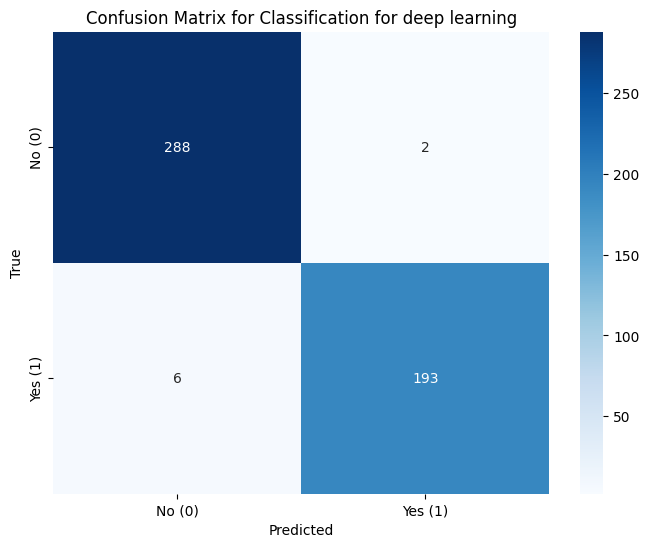


Fold 1 Classification Metrics (threshold=0.9):
Accuracy: 0.9836
Precision: 0.9897
Recall: 0.9698
F1 Score: 0.9797


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_squared_error


file = 'Deeplearning_results/fold_1/validation_predictions_true.csv'
df = pd.read_csv(file)

# Calculate regression MS
mse = mean_squared_error(df['Regression_True'], df['Regression_Prediction'])
print(f"Fold 1 Regression MSE: {mse:.4f}")

# Set threshold to convert probabilities to labels
threshold = 0.9
pred_labels = (df['Classification_Probability'] >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(df['Classification_True'], pred_labels)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classification for deep learning')
plt.savefig('fold_1_confusion_matrix.png')
plt.show()

# Calculate more classification evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(df['Classification_True'], pred_labels)
precision = precision_score(df['Classification_True'], pred_labels, zero_division=0)
recall = recall_score(df['Classification_True'], pred_labels, zero_division=0)
f1 = f1_score(df['Classification_True'], pred_labels, zero_division=0)

print(f"\nFold 1 Classification Metrics (threshold={threshold}):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Deep Learning Fold 1 - Mean Squared Error (MSE): 0.0089
Deep Learning Fold 1 - R² Score: 0.8755


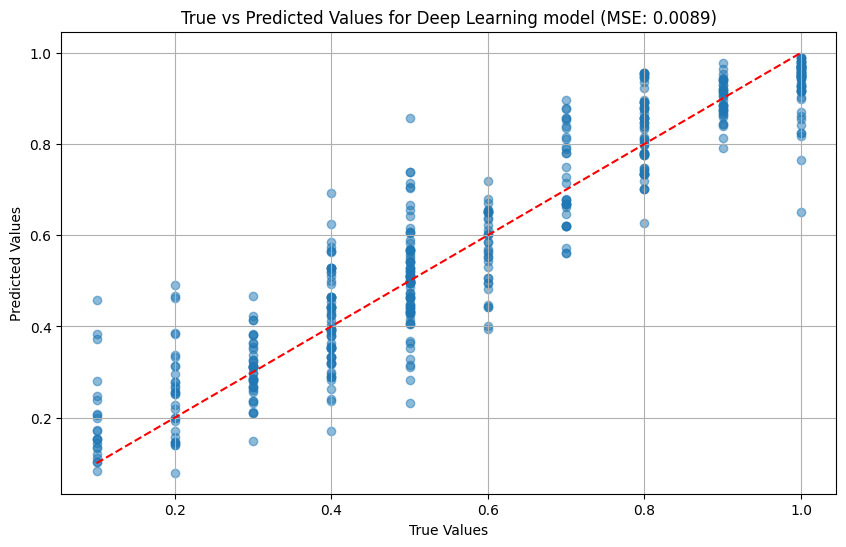

Deep Learning Fold 1 - Mean Absolute Error (MAE): 0.0713

Data sample (Deep Learning results):
   Regression_True  Regression_Prediction
0              1.0               0.921205
1              0.9               0.905567
2              0.5               0.440137
3              0.2               0.265828
4              0.8               0.735000


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Read the deep learning results from fold 1
file = 'Deeplearning_results/fold_1/validation_predictions_true.csv'
df = pd.read_csv(file)

# Get true values and predicted values for regression
true_values = df['Regression_True']
predicted_values = df['Regression_Prediction']

# Calculate MSE
mse = mean_squared_error(true_values, predicted_values)
print(f"Deep Learning Fold 1 - Mean Squared Error (MSE): {mse:.4f}")

# Calculate R² value
r2 = r2_score(true_values, predicted_values)
print(f"Deep Learning Fold 1 - R² Score: {r2:.4f}")

# Visualize comparison of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predicted_values, alpha=0.5)
plt.plot([true_values.min(), true_values.max()], 
         [true_values.min(), true_values.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values for Deep Learning model (MSE: {mse:.4f})')
plt.grid(True)
plt.savefig('Deeplearning_results/fold_1/regression_performance_dl.png')
plt.show()

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(true_values, predicted_values)
print(f"Deep Learning Fold 1 - Mean Absolute Error (MAE): {mae:.4f}")

# Print a few sample rows of the deep learning results
print("\nData sample (Deep Learning results):")
print(df[['Regression_True', 'Regression_Prediction']].head())

Column names in CSV file: ['True_Values', 'Predicted_Values', 'Squared_Error']
Mean Squared Error (MSE): 0.0213
R² Score: 0.7171


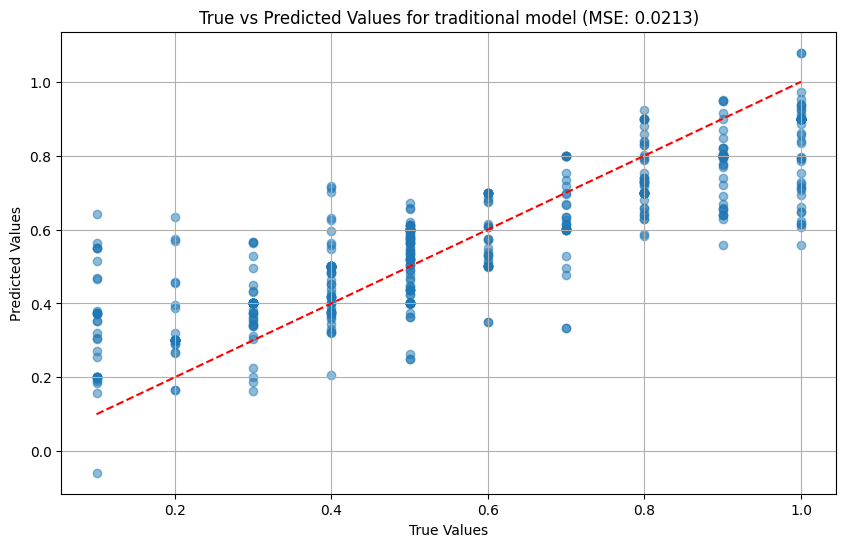


Data sample:
   True_Values  Predicted_Values  Squared_Error
0          0.1          0.156784       0.003224
1          0.8          0.728807       0.005068
2          0.3          0.400177       0.010035
3          1.0          0.622462       0.142535
4          0.5          0.503685       0.000014
Mean Absolute Error (MAE): 0.1163


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Read the regression results file
regression_results = pd.read_csv("svm_results/importance_regression_results.csv")

# Check column names
print("Column names in CSV file:", regression_results.columns.tolist())

# Get true values and predicted values
# Assuming the first column is true values, second column is predicted values
true_values = regression_results.iloc[:, 0]  # First column
predicted_values = regression_results.iloc[:, 1]  # Second column

# Or use specific column names (if you know them)
# true_values = regression_results['True_Values']
# predicted_values = regression_results['Predicted_Values']

# Calculate MSE
mse = mean_squared_error(true_values, predicted_values)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R² value
from sklearn.metrics import r2_score
r2 = r2_score(true_values, predicted_values)
print(f"R² Score: {r2:.4f}")

# Visualize comparison of true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predicted_values, alpha=0.5)
plt.plot([true_values.min(), true_values.max()], 
         [true_values.min(), true_values.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values for traditional model (MSE: {mse:.4f})')
plt.grid(True)
plt.savefig('regression_performance.png')
plt.show()

# Print a few sample rows
print("\nData sample:")
print(regression_results.head())

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(true_values, predicted_values)
print(f"Mean Absolute Error (MAE): {mae:.4f}")